# 自动求导
PyTorch 中所有神经网络的核心是autograd包.我们首先简单介绍一下这个包,然后训练我们的第一个神经网络.

autograd包为张量上的所有操作提供了自动求导.它是一个运行时定义的框架,这意味着反向传播是根据你的代码如何运行来定义,并且每次迭代可以不同.

接下来我们用一些简单的示例来看这个包

#变量（Variable）
#autograd.Variable是autograd包的核心类.它包装了张量(Tensor),支持几乎所有的张量上的操作.一旦你完成你的前向计算,可以通过.backward()方法来自动计算所有的梯度.
#可以通过.data属性来访问变量中的原始张量,关于这个变量的梯度被计算放入.grad属性中
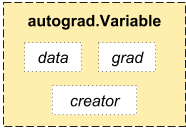
#对自动求导的实现还有一个非常重要的类,即函数(Function).
#变量(Variable)和函数(Function)是相互联系的,并形成一个非循环图来构建一个完整的计算过程.每个变量有一个.grad_fn属性,它指向创建该变量的一个Function,用户自己创建的变量除外,它的grad_fn属性为None.
#如果你想计算导数,可以在一个变量上调用.backward().如果一个Variable是一个标量(它只有一个元素值),你不必给该方法指定任何的参数,但是该Variable有多个值,你需要指定一个和该变量相同形状的的grad_output参数(查看API发现实际为gradients参数).

In [1]:
import torch
from torch.autograd import Variable

In [3]:
#创建一个变量
x = Variable(torch.ones(2,2),requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [4]:
#变量的额操作
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [5]:
#grad_fn attribute
#这里的x是属于用户自己定义的,而y属于函数产生的,所以y有grad_fn属性,而x没有.
print (x.grad_fn)
print (y.grad_fn)

None


In [10]:
#more operations on y
z = y*y*3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [11]:
#Gradients
out.backward()
print(x.grad)

tensor([[9., 9.],
        [9., 9.]])


In [15]:
x = torch.randn(3)
x = Variable(x,requires_grad=True)

y = x*2
while y.data.norm()<1000:
    y = y*2
    
print(y)

tensor([-965.8536,  536.1362,  222.6168], grad_fn=<MulBackward0>)


In [16]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)
print(y.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])
None
